In [1]:
from tensorflow.python.keras.utils import np_utils 
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import numpy as np

- np_utils 임포트할 때, tensorflow.keras로는 안됬는데 tensorflow.python.keras로는 됬음. 왜인진 모르겠다

In [2]:
np.random.seed(3)

### 데이터셋 생성하기

In [3]:
(x_train,y_train), (x_test, y_test) = mnist.load_data()

In [4]:
x_train.shape

(60000, 28, 28)

In [5]:
x_val = x_train[42000:]
y_val = y_train[42000:]
x_train = x_train[:42000]
y_train = y_train[:42000]

In [6]:
x_train

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

In [7]:
x_val.shape

(18000, 28, 28)

In [8]:
# 데이터 전처리

x_train = x_train.reshape(42000,784).astype('float32')/255
x_val = x_val.reshape(18000,784).astype('float32')/255
x_test = x_test.reshape(10000,784).astype('float32')/255

- 왜 255로 나눈지는 모르겠다

In [9]:
# 라벨데이터 원핫인코딩 처리

y_train = np_utils.to_categorical(y_train)
y_val = np_utils.to_categorical(y_val)
y_test = np_utils.to_categorical(y_test)

### 모델 구성하기

In [10]:
model = Sequential()
model.add(Dense(units = 64, input_dim = 28*28, activation='relu'))
model.add(Dense(units = 10, activation = 'softmax'))

### 모델 학습과정 설정하기

In [11]:
model.compile(loss='categorical_crossentropy',optimizer = 'sgd',metrics = ['accuracy'])

### 모델 학습시키기

In [12]:
model.fit(x_train,y_train,epochs = 5, batch_size = 10, validation_data =(x_val, y_val))

Epoch 1/5
4200/4200 [==============================] - 13s 3ms/step - loss: 0.5114 - accuracy: 0.8626 - val_loss: 0.3104 - val_accuracy: 0.9106
Epoch 2/5
4200/4200 [==============================] - 13s 3ms/step - loss: 0.2790 - accuracy: 0.9204 - val_loss: 0.2523 - val_accuracy: 0.9285
Epoch 3/5
4200/4200 [==============================] - 13s 3ms/step - loss: 0.2299 - accuracy: 0.9341 - val_loss: 0.2206 - val_accuracy: 0.9380
Epoch 4/5
4200/4200 [==============================] - 11s 3ms/step - loss: 0.1969 - accuracy: 0.9446 - val_loss: 0.1970 - val_accuracy: 0.9444
Epoch 5/5
4200/4200 [==============================] - 10s 2ms/step - loss: 0.1736 - accuracy: 0.9498 - val_loss: 0.1827 - val_accuracy: 0.9476


### 모델 평가하기

In [13]:
loss_and_metrics = model.evaluate(x_test,y_test,batch_size = 32)
print('')
print('loss_and_metrics : '+ str(loss_and_metrics))

313/313 [==============================] - 1s 2ms/step - loss: 0.1635 - accuracy: 0.9500

loss_and_metrics : [0.16353732347488403, 0.949999988079071]


### 모델 사용하기

In [14]:
xhat_idx = np.random.choice(x_test.shape[0],5)
xhat = x_test[xhat_idx]
yhat = model.predict_classes(xhat)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [15]:
from numpy import argmax

In [16]:
for i in range(5):
    print('True : ' + str(argmax(y_test[xhat_idx[i]])) + ',Predict : ' + str(yhat[i]))

True : 6,Predict : 6
True : 6,Predict : 6
True : 7,Predict : 7
True : 5,Predict : 5
True : 0,Predict : 6


# 모델 저장하기

<저장되는 정보>
- 나중에 모델을 재구성하기 위한 모델의 구성 정보
- 모델을 구성하는 각 뉴런들의 가중치
- 손실함수, 최적화하기 등의 학습 설정
- 재학습을 할 수 있도록 마지막 학습 상태

In [17]:
model.save('mnist_mlp_model.h5')

### 모델 아키텍처 보기

In [23]:
from IPython.display import SVG
from tensorflow.python.keras.utils.vis_utils import model_to_dot

In [19]:
%matplotlib inline

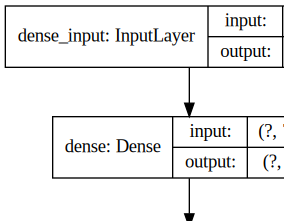

In [24]:
SVG(model_to_dot(model, show_shapes = True).create(prog='dot', format='svg'))

### 학습된 모델 불러오기

In [ ]:
from keras.models import load_model

In [ ]:
model = load_model('mnist_mlp_model.h5')

### 모델 사용하기

In [ ]:
yhat = model.predict_classes(xhat)

In [ ]:
for i in range(5):
    print('True : ' + str(argmax(y_test[xhat_idx[i]])) + ',Predict : ' + str(yhat[i]))

#### 모델 아키텍처와 모델 가중치 따로 저장 가능

- 모델 아키텍처

In [25]:
from models import model_from_json
json_string = model.to_json() # 모델 아키텍처를 json형식으로 저장
model = model_from_json(json_string) # json파일에서 모델 아키텍처 재구성

ModuleNotFoundError: No module named 'models'

In [ ]:
from models import model_from_yaml
yaml_string = model.to_yaml() # 모델 아키텍처를 yaml 형식으로 저장
model = model_from_yaml(yaml_string) # yaml 파일에서 모델 아키텍처 재구성

- 모델 가중치